In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward0 as awkward
import uproot3_methods as uproot_methods
import uproot3 as uproot

In [2]:
tree = uproot.open('../data/Run2012B_SingleMu_1000.root')['Events']
jet_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Jet_pt'].array(), tree['Jet_eta'].array(), tree['Jet_phi'].array(), tree['Jet_mass'].array())
trijet_indices = jet_p4.argchoose(3).unzip()
trijet_p4 = jet_p4[trijet_indices[0]] + jet_p4[trijet_indices[1]] + jet_p4[trijet_indices[2]]
best_trijet_index = abs(trijet_p4.mass - 172.5).argmin()
result1 = trijet_p4[best_trijet_index].pt.flatten()
best_trijet_jet_indices = awkward.concatenate((trijet_indices[0][best_trijet_index], trijet_indices[1][best_trijet_index], trijet_indices[2][best_trijet_index]), axis=1)
jet_btag = tree['Jet_btag'].array()
result2 = jet_btag[best_trijet_jet_indices].max()

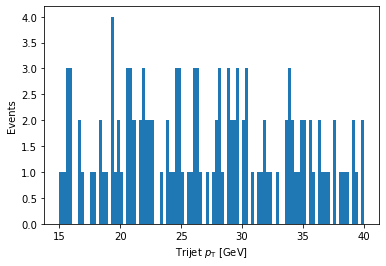

In [3]:
n1, bins1, _ = plt.hist(result1, 100, (15, 40))
plt.xlabel(r'Trijet $p_\mathrm{T}$ [GeV]')
plt.ylabel('Events')
plt.show()

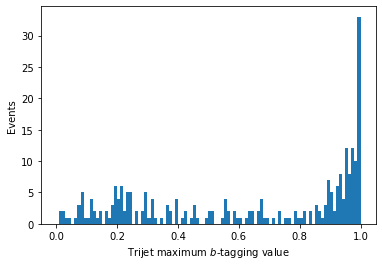

In [4]:
n2, bins2, _ = plt.hist(result2, 100, (0, 1))
plt.xlabel(r'Trijet maximum $b$-tagging value')
plt.ylabel('Events')
plt.show()

In [5]:
np.stack((bins1[:-1], bins1[1:], n1), axis=1)

array([[15.  , 15.25,  1.  ],
       [15.25, 15.5 ,  1.  ],
       [15.5 , 15.75,  3.  ],
       [15.75, 16.  ,  3.  ],
       [16.  , 16.25,  0.  ],
       [16.25, 16.5 ,  0.  ],
       [16.5 , 16.75,  2.  ],
       [16.75, 17.  ,  1.  ],
       [17.  , 17.25,  0.  ],
       [17.25, 17.5 ,  0.  ],
       [17.5 , 17.75,  1.  ],
       [17.75, 18.  ,  1.  ],
       [18.  , 18.25,  0.  ],
       [18.25, 18.5 ,  2.  ],
       [18.5 , 18.75,  1.  ],
       [18.75, 19.  ,  1.  ],
       [19.  , 19.25,  0.  ],
       [19.25, 19.5 ,  4.  ],
       [19.5 , 19.75,  1.  ],
       [19.75, 20.  ,  2.  ],
       [20.  , 20.25,  1.  ],
       [20.25, 20.5 ,  0.  ],
       [20.5 , 20.75,  3.  ],
       [20.75, 21.  ,  3.  ],
       [21.  , 21.25,  2.  ],
       [21.25, 21.5 ,  0.  ],
       [21.5 , 21.75,  2.  ],
       [21.75, 22.  ,  3.  ],
       [22.  , 22.25,  2.  ],
       [22.25, 22.5 ,  2.  ],
       [22.5 , 22.75,  2.  ],
       [22.75, 23.  ,  0.  ],
       [23.  , 23.25,  0.  ],
       [23

In [6]:
np.stack((bins2[:-1], bins2[1:], n2), axis=1)

array([[0.00000000e+00, 9.99999978e-03, 0.00000000e+00],
       [9.99999978e-03, 1.99999996e-02, 2.00000000e+00],
       [1.99999996e-02, 2.99999993e-02, 2.00000000e+00],
       [2.99999993e-02, 3.99999991e-02, 1.00000000e+00],
       [3.99999991e-02, 5.00000007e-02, 1.00000000e+00],
       [5.00000007e-02, 5.99999987e-02, 0.00000000e+00],
       [5.99999987e-02, 7.00000003e-02, 1.00000000e+00],
       [7.00000003e-02, 7.99999982e-02, 3.00000000e+00],
       [7.99999982e-02, 9.00000036e-02, 5.00000000e+00],
       [9.00000036e-02, 1.00000001e-01, 1.00000000e+00],
       [1.00000001e-01, 1.09999999e-01, 1.00000000e+00],
       [1.09999999e-01, 1.19999997e-01, 4.00000000e+00],
       [1.19999997e-01, 1.29999995e-01, 2.00000000e+00],
       [1.29999995e-01, 1.40000001e-01, 1.00000000e+00],
       [1.40000001e-01, 1.50000006e-01, 2.00000000e+00],
       [1.50000006e-01, 1.59999996e-01, 0.00000000e+00],
       [1.59999996e-01, 1.70000002e-01, 2.00000000e+00],
       [1.70000002e-01, 1.80000